In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from VisualisationFunctions2 import *

In [2]:
n_qubits = 3
posns = []
for i in range(n_qubits):
    
    posns.append([0,i])
    
posns = np.array(posns)

separations = []
for i in range(len(posns)):
    for j in range(i,len(posns)):
        
        if i != j:
            
            sep = np.linalg.norm(posns[i] - posns[j])
            separations.append(sep)  
            
qubits = []
for i in range(n_qubits):
    for j in range(i,n_qubits):
        
        if i != j:
            qubits.append([i,j])

coefficients = [k for k in separations]

CostFn = BuildCostFn_Pyquil(qubits,coefficients)

/home/ewan/RigettiCode/VisualisationFunctions2.py:229: ComplexWarning: Casting complex values to real discards the imaginary part
  cost[i,j] = EvaluateCostFunction(circuit,hamiltonian)


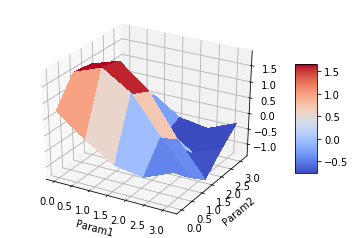

In [3]:
n_qubits = 3
n_gammas = 3
QAOA_p = 3

betas2var = [[2],[2]]
beta_range2var = [np.linspace(0,np.pi,5)]
betas = np.linspace(0,1,n_qubits*QAOA_p)

gammas2var = [[1],[2]]
gamma_range2var = [np.linspace(0,np.pi,5)]
gammas = np.linspace(0,1,QAOA_p*n_gammas)

params, param1, param2, param1_range, param2_range = LandscapeParameters(n_qubits,qubits,coefficients,QAOA_p,
                                                                         betas2var,beta_range2var,betas,gammas2var,
                                                                         gamma_range2var,gammas)

#cost = PlotParametricCostFunction(n_qubits,qubits,coefficients,CostFn,QAOA_p,betas2var,beta_range2var,
#                           betas,gammas2var,gamma_range2var,gammas)

cost = PlotParametricCostFunction(params, param1, param2, param1_range, param2_range,QAOA_p,
                           qubits,coefficients,n_qubits,CostFn,n_qubits)

In [8]:
# TODO: run profiler on the code - probably have a lot of redundancy in building the Hamiltonian etc.

In [4]:
Operators_Dict = BuildPauliOps(n_qubits,qubits)

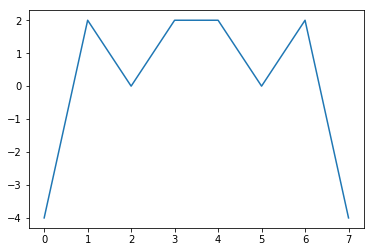

In [5]:
PlotBareCostFunction(n_qubits, Operators_Dict, coefficients)

/home/ewan/anaconda3/lib/python3.7/site-packages/pyquil/paulis.py:707: UserWarning: The term Z2Z1 will be combined with Z1Z2, but they have different orders of operations. This doesn't matter for QVM or wavefunction simulation but may be important when running on an actual device.
  .format(t.id(sort_ops=False), first_term.id(sort_ops=False)))
/home/ewan/anaconda3/lib/python3.7/site-packages/pyquil/paulis.py:707: UserWarning: The term Z2Z0 will be combined with Z0Z2, but they have different orders of operations. This doesn't matter for QVM or wavefunction simulation but may be important when running on an actual device.
  .format(t.id(sort_ops=False), first_term.id(sort_ops=False)))
/home/ewan/anaconda3/lib/python3.7/site-packages/pyquil/paulis.py:707: UserWarning: The term Z1Z0 will be combined with Z0Z1, but they have different orders of operations. This doesn't matter for QVM or wavefunction simulation but may be important when running on an actual device.
  .format(t.id(sort_ops=Fa

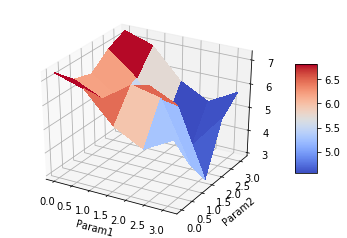

In [4]:
variance = PlotParametricVariance(params, param1, param2, param1_range, param2_range,QAOA_p,
                           qubits,coefficients,n_qubits,CostFn,n_qubits)